In [2]:
import math
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt 

from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from sklearn import utils

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import datetime

import os, time

import numpy as np
import matplotlib.pylab as plt


import pandas as pd


## Currencies change arbitrage.

We want to see if we can take advantage of possible currency1/currency2/currency3/currency1 triangle arbitrage.

# Data reading

We import 2019 data for ZEC/ETH, ZEC/BETC, ETH/ BTC 

In [3]:
ZECETH_min = pd.read_csv("./datas/gemini_ZECETH_2019_1min.csv")
ZECBTC_min = pd.read_csv("./datas/gemini_ZECBTC_2019_1min.csv")
ETHBTC_min = pd.read_csv("./datas/gemini_ETHBTC_2019_1min.csv")

ZECETH_min = ZECETH_min.iloc[len(ZECETH_min)::-1].set_index([pd.Index([i for i in range(len(ZECETH_min))])])
ZECBTC_min = ZECBTC_min.iloc[len(ZECBTC_min)::-1].set_index([pd.Index([i for i in range(len(ZECBTC_min))])])
ETHBTC_min = ETHBTC_min.iloc[len(ETHBTC_min)::-1].set_index([pd.Index([i for i in range(len(ETHBTC_min))])])

In [4]:
comp = pd.DataFrame(columns=["ETH_BTC", "ZEC_BTC", "ZEC_ETH"])
comp_dates = pd.DataFrame(columns=["dates_ETH_BTC", "dates_ZEC_BTC", "dates_ZEC_ETH"])

In [5]:
comp.ETH_BTC = ETHBTC_min.Open
comp.ZEC_BTC = ZECBTC_min.Open
comp.ZEC_ETH = ZECETH_min.Open

comp_dates.dates_ETH_BTC = ETHBTC_min.Date
comp_dates.dates_ZEC_BTC = ZECBTC_min.Date
comp_dates.dates_ZEC_ETH = ZECETH_min.Date

In [6]:
i = 0
while comp_dates.dates_ETH_BTC[i] == comp_dates.dates_ZEC_BTC[i] and comp_dates.dates_ETH_BTC[i] == comp_dates.dates_ZEC_ETH[i] :
    i = i+1
max_index = i



In [7]:
results_conv = []
wins = []
x = 0
for i in range(max_index):
    x = (1/comp.ETH_BTC[i])*(1/comp.ZEC_ETH[i])*(comp.ZEC_BTC[i])
    results_conv.append(x)
    wins.append(abs(1-x))


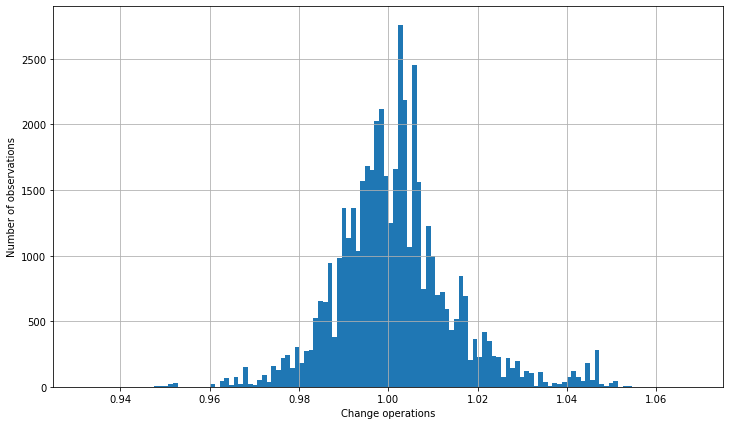

In [9]:
fig = plt.figure(figsize=(12,7))

n, bins, patches = plt.hist(results_conv, 250)

plt.xlabel('Change operations')
plt.ylabel('Number of observations')
plt.axis([0.925, 1.075, 0, 2900])
plt.grid(True)

plt.savefig("FX_btc.png")

We do not have exactly something equal to 1 but this spread is relatively small, and should be neglected as either bid-ask spread nor fees have been taken in account yet. So we can consider there is not much to do about possible triangle arbitrage.


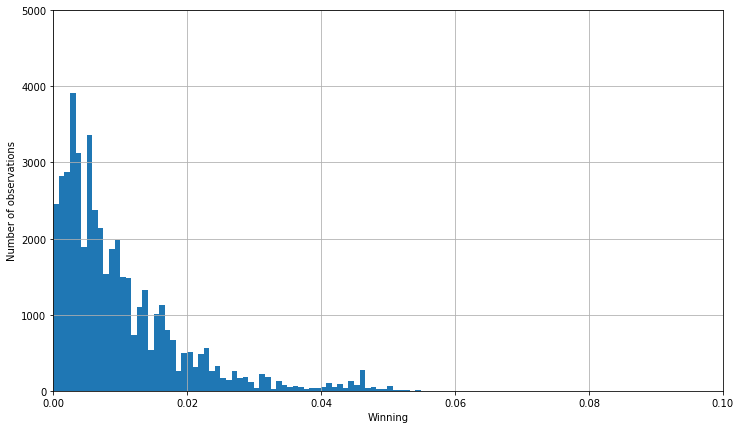

In [10]:
fig = plt.figure(figsize=(12,7))

n, bins, patches = plt.hist(wins, 250)

plt.xlabel('Winning')
plt.ylabel('Number of observations')
plt.axis([0, 0.1, 0, 5000])
plt.grid(True)
plt.savefig("arbitrage_won.png")

In [11]:
def positive_part(x):
    if x < 0:
        return 0
    return x

def net_gain(wins, cost):
    w = [positive_part(x) for x in (wins - cost)]
    return np.mean(w)

wins = np.array(wins)
costs = np.linspace(0,0.05,100)
gain = [net_gain(wins, x) for x in costs]

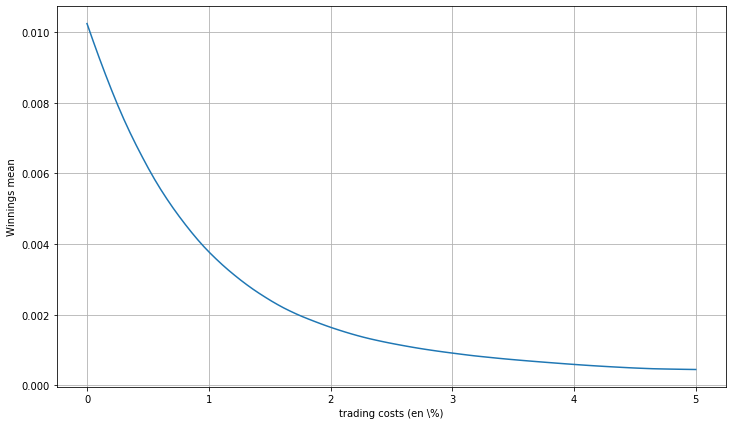

In [12]:
fig = plt.figure(figsize=(12,7))

plt.plot(costs*100, gain, label = "wins")

plt.xlabel('trading costs (en \%)')
plt.ylabel('Winnings mean')

plt.grid(True)

plt.savefig("winning costs.png")

If trading was immediate and with no cost, an arbitrage would be easy to calculate. We just would have to apply the change operation as described.
We can see the results on the first figure ( the gains are in bitcoin as we start and end in bitcoin)
We need to play exchange fees 3 times and by taking market prices we dont take in account bid ask spread.
We would need to add some percentage to trading costs.
The gains as a function of those costs are presented in the figure just above.

Practically this arbitrage can be realized as long as the order book for one of the 3 currencies is not empty and the price has not changed.
It is difficult to quantify the number of orders which can be passed with this strategy because we dont have acces to the LOB data.


